## Importing relevant libraries

In [453]:
#data cleaning and manipulation libraries
import numpy as np
import pandas as pd

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#text processing library
from textblob import TextBlob

## Analysis on fashion category

#### Importing data

In [454]:
fashion = pd.read_csv('Amazon_Fashio.csv')

In [455]:
fashion.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Color:,Size:
0,0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys
1,1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys
2,2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys
3,3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys
4,4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys


In [456]:
fashion = fashion.drop('Unnamed: 0', axis=1)
fashion = fashion.rename(columns={"overall":"productRating","asin":"productID", "Size:":"size"})

In [457]:
fashion['reviewTime'] = pd.to_datetime(fashion['reviewTime'])

### Datetime Analysis

#### Amount of reviews per year and month

In [458]:
fashion['year'] = fashion['reviewTime'].dt.year
fashion['yearMonth'] = fashion['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [459]:
fashion.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,yearMonth
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,September-2015
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,September-2015
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,September-2015
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,September-2015
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,September-2015


In [460]:
fashion.groupby('year').count()[['reviewText']]

,reviewText
year,
2009,4
2010,5
2012,4
2014,10
2015,43
2016,895
2017,1651
2018,548


In [461]:
review_count_m_y  = fashion.groupby(['yearMonth']).count()[['reviewText']]
review_count_m_y

,reviewText
yearMonth,
April-2016,48
April-2017,206
April-2018,128
August-2014,2
August-2016,91
August-2017,152
December-2009,4
December-2012,4
December-2014,6


#### Average rating per year and month

In [462]:
avg_rating_m_y = fashion.groupby(['yearMonth']).mean()[['productRating']]
avg_rating_m_y

,productRating
yearMonth,
April-2016,4.333333
April-2017,4.669903
April-2018,4.470588
August-2014,5.000000
August-2016,4.648352
August-2017,4.105263
December-2009,4.000000
December-2012,3.000000
December-2014,4.000000


#### Visualisations

In [463]:
len(fashion["year"].unique())

8

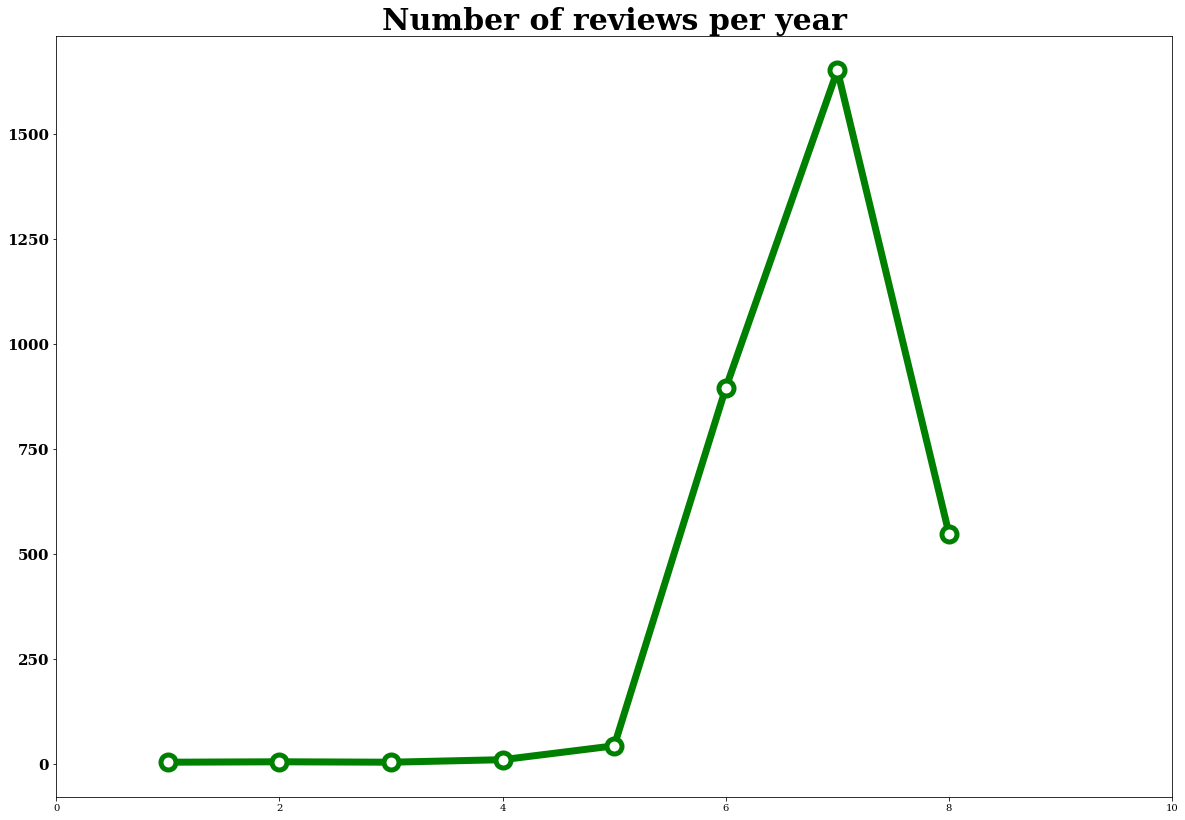

In [464]:
len(appliances_df["year"].unique())

review_count_y  = fashion.groupby(['year']).count()[['reviewText']]
axes1 =review_count_y
x = np.arange(1,9)

plt.rc('font', family = 'serif')
fig, ax  = plt.subplots(figsize = (20,14))
plt.xlim(0,10)

ax.plot(x, axes1.reviewText, 'green', lw = 7)
ax.plot(x, axes1.reviewText, 'wo', markersize = 15, markeredgecolor = 'green', markeredgewidth = 5, label = 'Number of reviews')      
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black')

plt.title('Number of reviews per year', fontsize = 30, fontweight = 'bold', color = 'black')
fig.savefig('no_of_rev_fash.png', dpi=100)
plt.show()

<ipython-input-465-57d4fbe36151>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


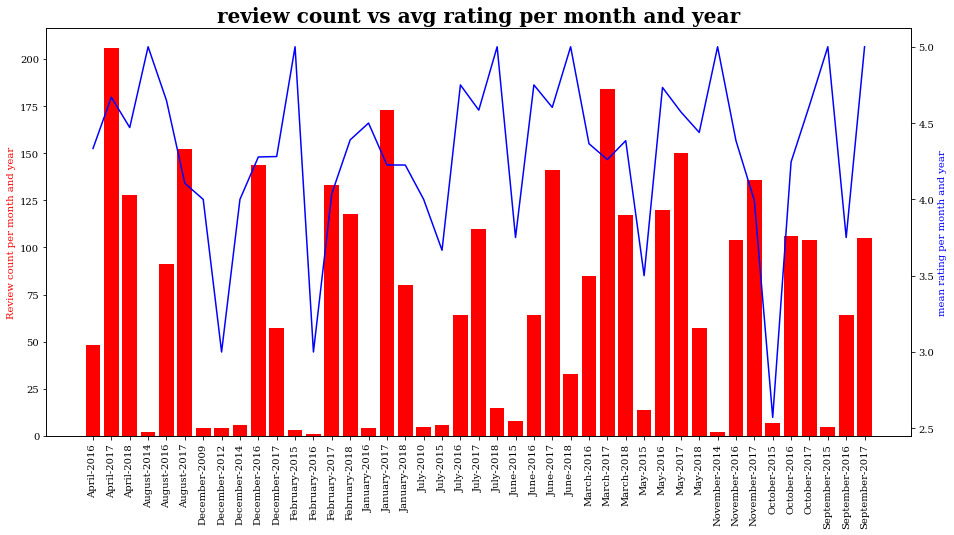

In [465]:
axes1 = review_count_m_y
axes2 = avg_rating_m_y

key = [key for key, df in fashion.groupby('yearMonth')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('review count vs avg rating per month and year', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig('rev_vs_rating_month_fash.png', dpi=100)
plt.show()

<ipython-input-466-c07d070b7d2d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


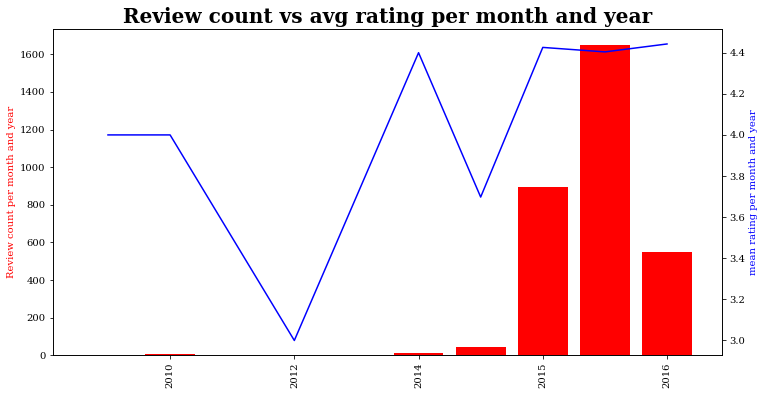

In [466]:
 axes1 = fashion.groupby(['year']).count()[['reviewText']]
axes2 = fashion.groupby('year').mean()[['productRating']]

key = [key for key, df in fashion.groupby('year')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('Review count vs avg rating per month and year', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(12, 6)
fig.savefig('rev_vs_rating_year_fash.png', dpi=100)
plt.show()

### Simple sentiment analysis

In [467]:
# get polarity of the text
def the_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

# add label to the polarity
def the_sentiment_label(text):
    if the_sentiment(text)>0:
        polarity_label = 'positive'
    elif the_sentiment(text)<0:
        polarity_label = 'negative'
    else:
        polarity_label = 'neutral'
    return polarity_label

#### Add columns: sentiment and sentimentLabel

In [468]:
fashion['reviewText'] = fashion['reviewText'].astype(str)
fashion['sentiment'] = fashion['reviewText'].apply(the_sentiment)
fashion['sentimentLabel'] = fashion['reviewText'].apply(the_sentiment_label)

In [469]:
fashion.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,yearMonth,sentiment,sentimentLabel
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,September-2015,1.0,positive
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,September-2015,1.0,positive
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,September-2015,1.0,positive
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,September-2015,1.0,positive
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,September-2015,1.0,positive


#### Number of each label

In [470]:
fashion.groupby(['productRating']).count()[['sentiment']]

,sentiment
productRating,
1,117
2,93
3,337
4,471
5,2158


In [471]:
fashion.groupby(['sentimentLabel']).count()[['sentiment']]

,sentiment
sentimentLabel,
negative,198
neutral,178
positive,2800


#### Find Number of genuine good, bad and neutral ratings

In [472]:
genuine_good_rating = fashion[(fashion['sentimentLabel']=='positive') & (fashion['productRating']>3)]
len(genuine_good_rating)

2439

In [473]:
genuine_bad_rating = fashion[(fashion['sentimentLabel']=='negative') & (fashion['productRating']<3)]
len(genuine_bad_rating)

83

In [474]:
genuine_neutral_rating = fashion[(fashion['sentimentLabel']=='neutral') & (fashion['productRating']==3)]
len(genuine_neutral_rating)

20

In [475]:
genuine_df1 = genuine_good_rating.append(genuine_bad_rating)
fashion_genuine = genuine_df1.append(genuine_neutral_rating)
fashion_genuine

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,yearMonth,sentiment,sentimentLabel
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,September-2015,1.0,positive
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,September-2015,1.0,positive
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,September-2015,1.0,positive
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,September-2015,1.0,positive
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,September-2015,1.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,3,True,2017-01-31,AODFGQL9CC7G7,B005AGO4LU,ZS87,Squeaky,Racer Blue/Obsidian/Blue Tint,7.5 B(M) US,2017,January-2017,0.0,neutral
2439,3,True,2018-01-09,A3U0BBRU2Q85LE,B010RRWKT4,Alix gray,"On the left shoe, there were two stained yello...",Blue Tint/Green Glow/Hasta/White,9.5 M US,2018,January-2018,0.0,neutral
2619,3,True,2017-01-31,AODFGQL9CC7G7,B010RRWKT4,ZS87,Squeaky,Racer Blue/Obsidian/Blue Tint,7.5 M US,2017,January-2017,0.0,neutral
2815,3,True,2018-01-09,A3U0BBRU2Q85LE,B014IBJKNO,Alix gray,"On the left shoe, there were two stained yello...",Blue Tint/Green Glow/Hasta/White,9.5 M US,2018,January-2018,0.0,neutral


#### Visualisations

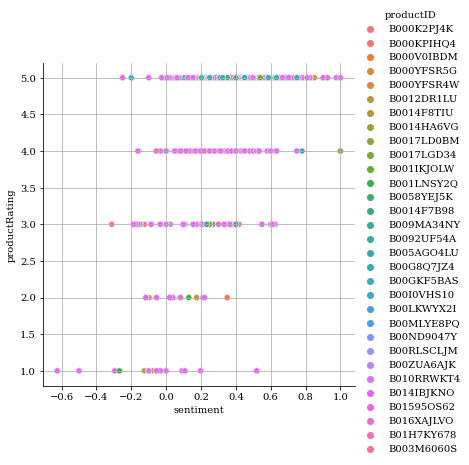

In [476]:
sns.relplot(x = 'sentiment', y='productRating', hue = 'productID', data = fashion)
plt.grid()
fig.savefig('rating_vs_sent_fash.png', dpi=100)
plt.show()

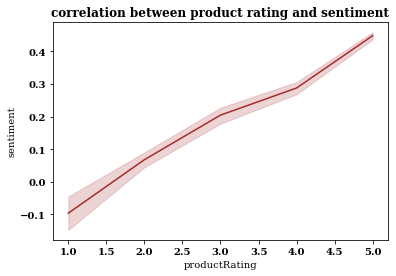

In [477]:
sns.lineplot(data=fashion,x='productRating',y='sentiment', color="brown")
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
fig.savefig('corr_sent_rating_fash.png', dpi=100)
plt.show()

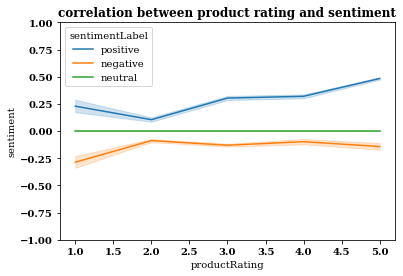

In [478]:
sns.lineplot(data=fashion,x='productRating',y='sentiment',hue='sentimentLabel')
plt.ylim(-1,1)
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
fig.savefig('corr_sentlabel_rating_fash.png', dpi=100)
plt.show()

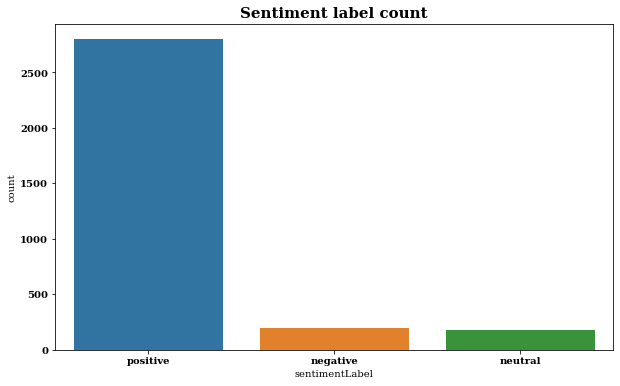

In [479]:
plt.figure(figsize=(10,6))
sns.countplot(data=fashion, x="sentimentLabel")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Sentiment label count", fontsize = 15, fontweight = 'bold', color = 'black')
fig.savefig('sentlabel_count_fash.png', dpi=100)
plt.show()

### Analysis on Product (productID)

#### Number of products

In [480]:
len(fashion.groupby('productID'))

31

#### Number of reviews per product

In [481]:
rev_per_prod = fashion.groupby('productID').count()[['reviewText']]
rev_per_prod = rev_per_prod.rename(columns={'reviewText':'reviewCount'})
rev_per_prod

,reviewCount
productID,
B000K2PJ4K,10
B000KPIHQ4,7
B000V0IBDM,7
B000YFSR4W,36
B000YFSR5G,56
B0012DR1LU,4
B0014F7B98,374
B0014F8TIU,8
B0014HA6VG,4


#### Sort review count per product

In [482]:
rev_per_prod.sort_values('reviewCount', ascending=False)

,reviewCount
productID,
B009MA34NY,377
B005AGO4LU,376
B010RRWKT4,376
B0092UF54A,376
B014IBJKNO,375
B0014F7B98,374
B0058YEJ5K,367
B001IKJOLW,365
B000YFSR5G,56


#### Genuine Sentiment Label per product

In [483]:
GSL_prod = fashion_genuine.groupby(['productID', 'sentimentLabel']).count()[['sentiment']]
GSL_prod['sentimentLabel'] = GSL_prod.index.get_level_values(1)
GSL_prod['productID']=GSL_prod.index.get_level_values(0)
GSL_prod = GSL_prod.rename(columns={"sentiment":"sentimentCount"})
GSL_prod

sentimentCount sentimentLabel   productID
productID  sentimentLabel                                           
B000K2PJ4K positive                     8       positive  B000K2PJ4K
B000KPIHQ4 negative                     1       negative  B000KPIHQ4
           positive                     5       positive  B000KPIHQ4
B000V0IBDM negative                     1       negative  B000V0IBDM
           positive                     5       positive  B000V0IBDM
B000YFSR4W negative                     2       negative  B000YFSR4W
           neutral                      2        neutral  B000YFSR4W
           positive                    18       positive  B000YFSR4W
B000YFSR5G negative                     2       negative  B000YFSR5G
           neutral                      2        neutral  B000YFSR5G
           positive                    30       positive  B000YFSR5G
B0012DR1LU positive                     4       positive  B0012DR1LU
B0014F7B98 negative                     9       negative  B0014F7B98
           neutral                      2        neutral  B0014F7B98
           positive                   291       positive  B0014F7B98
B0014F8TIU negative                     4       negative  B0014F8TIU
           positive                     2       positive  B0014F8TIU
B0014HA6VG positive                     2       positive  B0014HA6VG
B0017LD0BM positive                     4       positive  B0017LD0BM
B0017LGD34 positive                     4       positive  B0017LGD34
B001IKJOLW negative                     9       negative  B001IKJOLW
           neutral                      2        neutral  B001IKJOLW
           positive                   285       positive  B001IKJOLW
B001LNSY2Q negative                     1       negative  B001LNSY2Q
           positive                     4       positive  B001LNSY2Q
B003M6060S positive                     1       positive  B003M6060S
B0058YEJ5K negative                     9       negative  B0058YEJ5K
           neutral                      2        neutral  B0058YEJ5K
           positive                   287       positive  B0058YEJ5K
B005AGO4LU negative                     9       negative  B005AGO4LU
           neutral                      2        neutral  B005AGO4LU
           positive                   293       positive  B005AGO4LU
B0092UF54A negative                     9       negative  B0092UF54A
           neutral                      2        neutral  B0092UF54A
           positive                   293       positive  B0092UF54A
B009MA34NY negative                     9       negative  B009MA34NY
           neutral                      2        neutral  B009MA34NY
           positive                   294       positive  B009MA34NY
B00G8Q7JZ4 positive                     7       positive  B00G8Q7JZ4
B00GKF5BAS positive                     1       positive  B00GKF5BAS
B00I0VHS10 positive                     2       positive  B00I0VHS10
B00LKWYX2I positive                     1       positive  B00LKWYX2I
B00MLYE8PQ positive                     1       positive  B00MLYE8PQ
B00ND9047Y positive                     1       positive  B00ND9047Y
B00RLSCLJM positive                     8       positive  B00RLSCLJM
B010RRWKT4 negative                     9       negative  B010RRWKT4
           neutral                      2        neutral  B010RRWKT4
           positive                   294       positive  B010RRWKT4
B014IBJKNO negative                     9       negative  B014IBJKNO
           neutral                      2        neutral  B014IBJKNO
           positive                   292       positive  B014IBJKNO
B01595OS62 positive                     1       positive  B01595OS62
B016XAJLVO positive                     1       positive  B016XAJLVO

#### Visualisations

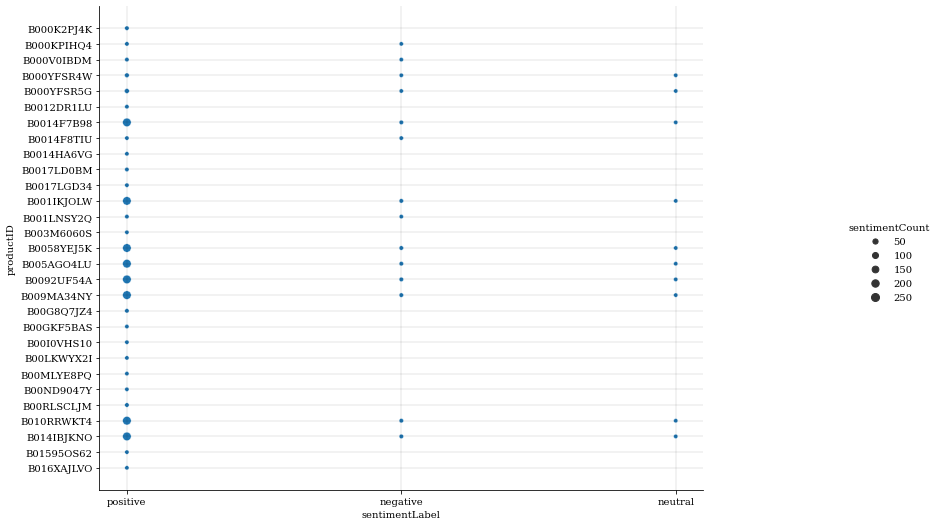

In [484]:
sns.relplot(x = 'sentimentLabel', y='productID', size ='sentimentCount', data = GSL_prod)
plt.grid(color='black', linestyle='-', linewidth=0.1)
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

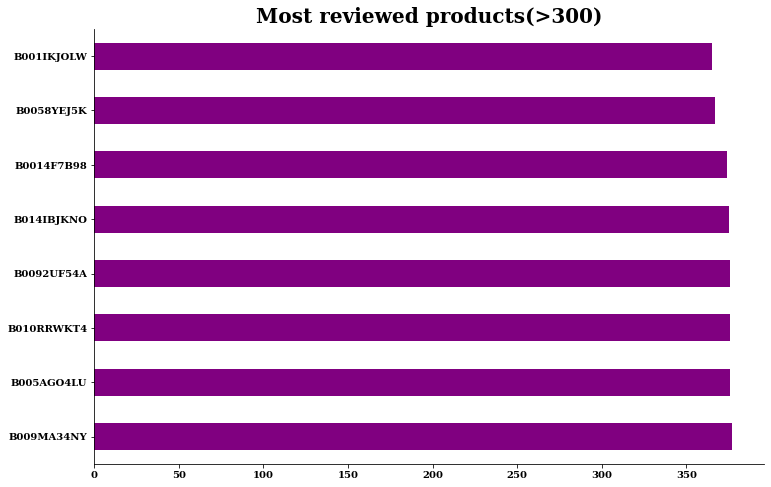

In [485]:
plt.figure(figsize=(12,8))
fashion["productID"].value_counts().nlargest(8).plot(kind='barh', color = "purple")
plt.title("Most reviewed products(>300)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('most_rev_prod_fash.png', dpi=100)
plt.show()

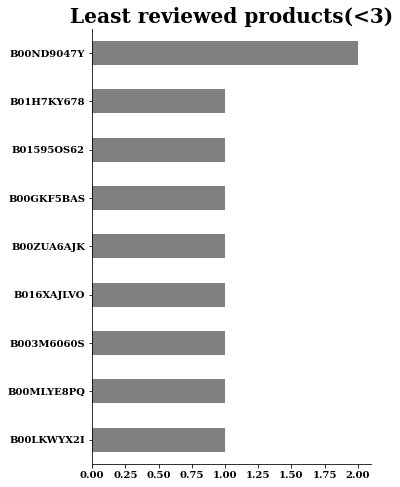

In [486]:
plt.figure(figsize=(5,8))
fashion["productID"].value_counts().nsmallest(9).plot(kind='barh', color="grey")
plt.title("Least reviewed products(<3)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('least_rev_prod_fash.png', dpi=100)
plt.show()

### Analysis on reviewers (reviewerID)

#### Number of reviewers

In [487]:
len(fashion.groupby('reviewerID'))

406

#### Review count per reviewer

In [488]:
R_C = fashion.groupby('reviewerID').count()[['reviewText']].sort_values('reviewText',ascending=False)
R_C = R_C.rename(columns={'reviewText':'reviewCount'})
R_C

,reviewCount
reviewerID,
AT7UEQ7UJB0RU,16
A37K0VP2H8FKOU,16
A3OP70LPLALBKN,16
A3BN0MRGRDKM0J,10
A2YI41MCJB2QCV,9
...,...
A3GJ3DJU1RXOHN,5
AGZ5OOZVDO194,5
A3LJRA2I5F34W5,5


#### Most reviews done in a day per ID

In [489]:
time_id = fashion_genuine.groupby(['reviewTime', 'reviewerID']).count().sort_values('productRating', ascending=False)[['productRating']]
time_id = time_id.rename(columns={"productRating":"reviewCount"})
time_id

,,reviewCount
reviewTime,reviewerID,
2017-11-27,A3OP70LPLALBKN,16
2017-03-08,A37K0VP2H8FKOU,16
2017-05-19,AT7UEQ7UJB0RU,16
2017-03-18,A2KMWD77XBGZ8K,8
2017-05-29,AJWKZNI5VHW86,8
...,...,...
2018-02-01,A3VGHF7VNFBMCQ,1
2014-12-31,A1Y01U6OZLZE7I,1
2017-12-18,A1EZN3E9R322YJ,1


#### visualisation

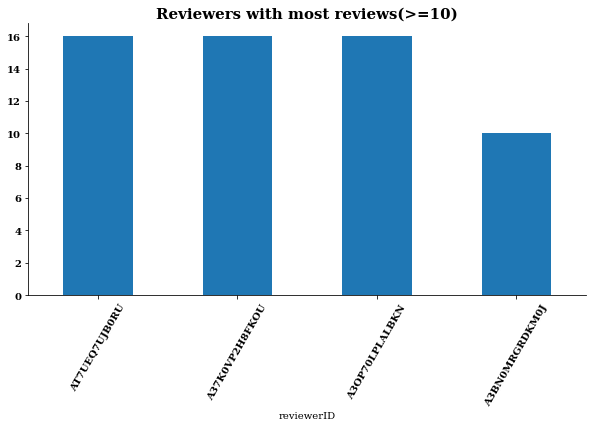

In [490]:
plt.figure(figsize=(10,5))
R_C["reviewCount"].nlargest(4).plot(kind="bar",color="tab:blue")
plt.title("Reviewers with most reviews(>=10)", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('reviewer_most_rev_fash.png', dpi=100)
plt.show()

### Analysis on product ratings (productRating)



#### Average rating per reviewer

In [491]:
rating_per_reviewer = fashion.groupby("reviewerID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_reviewer.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER REVIEWER:")
rating_per_reviewer

AVERAGE RATING PER REVIEWER:


,numberOfReviews,averageProductRating
reviewerID,,
AT7UEQ7UJB0RU,16,5.0
A37K0VP2H8FKOU,16,4.0
A3OP70LPLALBKN,16,5.0
A3BN0MRGRDKM0J,10,5.0
A2YI41MCJB2QCV,9,3.0
...,...,...
A3GJ3DJU1RXOHN,5,4.0
AGZ5OOZVDO194,5,5.0
A3LJRA2I5F34W5,5,5.0


#### Least satisfied customers

In [492]:
least_sat_cust = rating_per_reviewer["averageProductRating"].nsmallest(10)

print("LEAST SATISFIED CUSTOMERS: \n{}".format(least_sat_cust))

LEAST SATISFIED CUSTOMERS: 
reviewerID
A3PTZ7IHGU9BA8    1.0
A6CXK8NXD50R2     1.0
A3T9CL6JYWAP40    1.0
A3SM5XENOINDNH    1.0
A39XW67H6XEUOJ    1.0
AP8CWOZ30P4GH     1.0
AUE82PKEUMKZB     1.0
A8DR2Z71DERN0     1.0
A23TE15JI8Q2YQ    1.0
A2XUQXG9J9SRTG    1.0
Name: averageProductRating, dtype: float64


#### visualisation

In [493]:
axes1 = fashion_genuine.groupby('productID').count()
axes2 = fashion_genuine.groupby('productID').mean()

<ipython-input-494-3264c5af63c7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


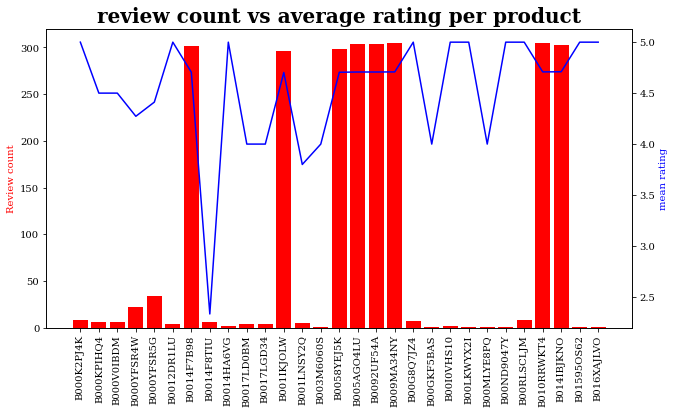

In [494]:
key = [key for key, df in fashion_genuine.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('review count vs average rating per product', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
fig.savefig('rev_vs_rating_prod_fash.png', dpi=100)
plt.show()

## Analysis on beauty category

#### Importing data

In [495]:
beauty_df = pd.read_csv("beauty.csv")

In [496]:
beauty_df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,Size:
0,0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,7.0 oz
1,1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,7.0 oz
2,2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,7.0 oz
3,3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,7.0 oz
4,4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,200ml/6.7oz


In [497]:
del beauty_df["Unnamed: 0"]

In [498]:
beauty_df['reviewTime'] = pd.to_datetime(beauty_df['reviewTime'])
#beauty_df.head()

In [499]:
beauty_df.rename(columns={"overall":"productRating","asin":"productID", "Size:":"size"}, inplace=True)
beauty_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,size
0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,7.0 oz
1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,7.0 oz
2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,7.0 oz
3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,7.0 oz
4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,200ml/6.7oz


#### The Data at a glance

In [500]:
beauty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   productRating  5269 non-null   int64         
 1   verified       5269 non-null   bool          
 2   reviewTime     5269 non-null   datetime64[ns]
 3   reviewerID     5269 non-null   object        
 4   productID      5269 non-null   object        
 5   reviewerName   5269 non-null   object        
 6   reviewText     5264 non-null   object        
 7   size           4358 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 293.4+ KB


In [501]:
beauty_df.isnull().sum()

productRating      0
verified           0
reviewTime         0
reviewerID         0
productID          0
reviewerName       0
reviewText         5
size             911
dtype: int64

### Analysis with datetimes

In [502]:
time_span = beauty_df["reviewTime"].max() - beauty_df["reviewTime"].min()

print ("Time span of the data: {}".format(time_span))

Time span of the data: 5084 days 00:00:00


In [503]:
beauty_df["year"] = beauty_df["reviewTime"].dt.year
beauty_df["yearMonth"] = beauty_df['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [504]:
year_count = beauty_df.groupby("year").count().sort_values(
    "reviewText", ascending=False)[["reviewText"]]
year_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER YEAR:")
year_count

AMOUNT OF REVIEWS PER YEAR:


,numberOfReviews
year,
2016,1232
2015,1027
2017,825
2014,784
2013,756
2018,443
2012,111
2009,25
2008,20


In [505]:
month_count = beauty_df.groupby("yearMonth").count()[["reviewText"]]
month_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER MONTH:")
month_count

AMOUNT OF REVIEWS PER MONTH:


,numberOfReviews
yearMonth,
April-2007,2
April-2011,5
April-2013,76
April-2014,36
April-2015,83
...,...
September-2013,56
September-2014,84
September-2015,75


In [506]:
yearly_rating = beauty_df.groupby("year").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
yearly_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER YEAR:")
yearly_rating

AVERAGE RATINGS PER YEAR:


,numberOfReviews,averageProductRating
year,,
2016,1232,4.933442
2015,1027,4.932171
2017,825,4.713939
2014,784,4.891582
2013,756,4.880952
2018,443,3.724605
2012,111,4.927928
2009,25,4.680000
2008,20,3.200000


In [507]:
yearly_month_rating = beauty_df.groupby(["yearMonth"]).agg({"reviewText":"count", "productRating":"mean"})
yearly_month_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER MONTH:")
yearly_month_rating

AVERAGE RATINGS PER MONTH:


,numberOfReviews,averageProductRating
yearMonth,,
April-2007,2,5.000000
April-2011,5,3.800000
April-2013,76,4.460526
April-2014,36,4.972222
April-2015,83,4.927711
...,...,...
September-2013,56,5.000000
September-2014,84,4.940476
September-2015,75,4.893333


#### Visualisations

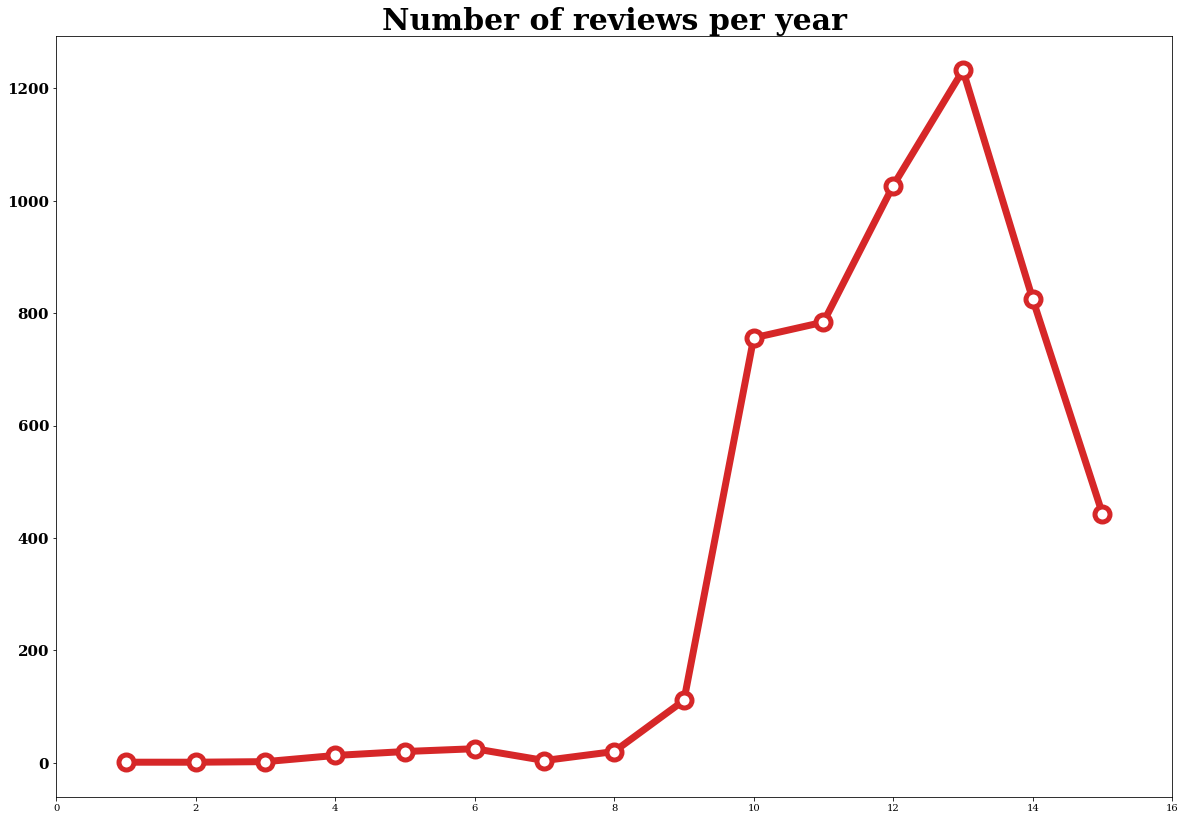

In [508]:
review_count_y  = beauty_df.groupby(['year']).count()[['reviewText']]
axes1 =review_count_y
x = np.arange(1,16)

plt.rc('font', family = 'serif')
fig, ax  = plt.subplots(figsize = (20,14))
plt.xlim(0,16)

ax.plot(x, axes1.reviewText, 'tab:red', lw = 7)
ax.plot(x, axes1.reviewText, 'wo', markersize = 15, markeredgecolor = 'tab:red', markeredgewidth = 5, label = 'Number of reviews')      
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black')

plt.title('Number of reviews per year', fontsize = 30, fontweight = 'bold', color = 'black')
fig.savefig('no_of_rev_beau.png', dpi=100)
plt.show()

<ipython-input-509-0d234717aa24>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


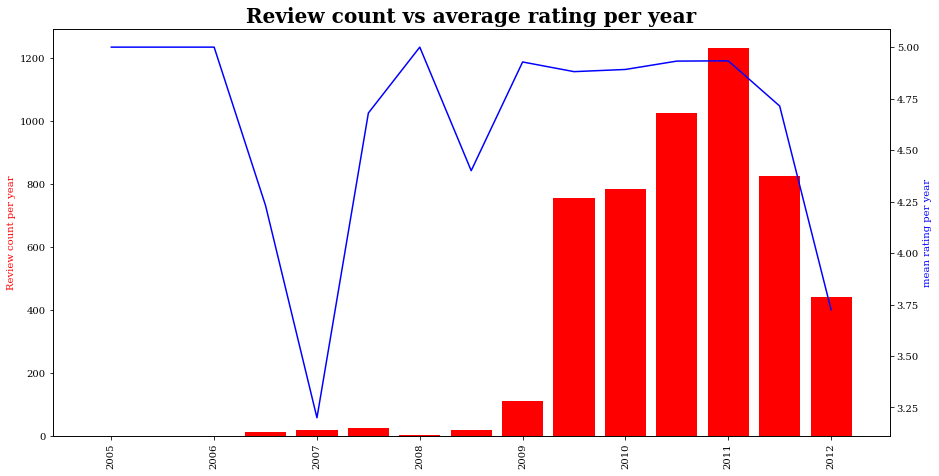

In [509]:
axes1 = beauty_df.groupby(['year']).count()[['reviewText']]
axes2 = beauty_df.groupby('year').mean()[['productRating']]

key = [key for key, df in beauty_df.groupby('year')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per year', color = 'r')
ax2.set_ylabel('mean rating per year', color = 'b')
ax1.set_title('Review count vs average rating per year', fontsize =20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.savefig('rev_vs_rating_year_beau.png', dpi=100)
plt.show()

<ipython-input-510-5ba613e5e9bd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


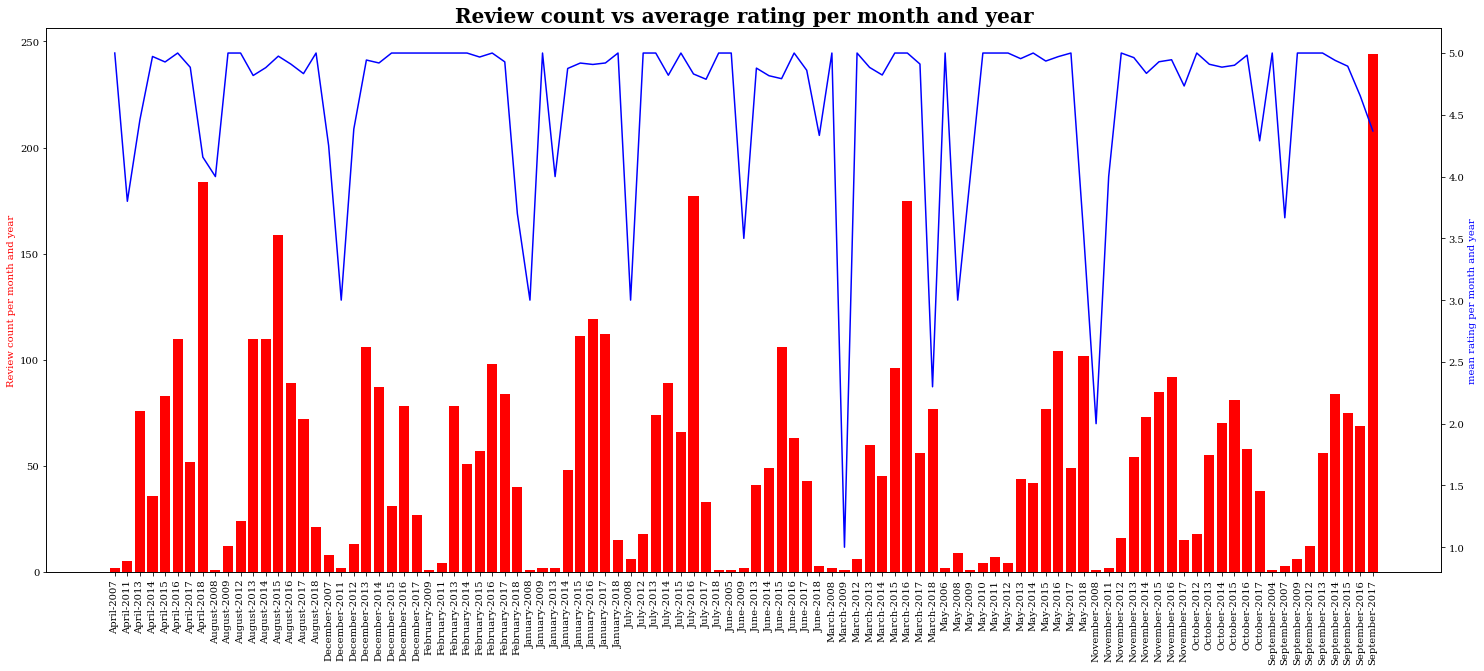

In [510]:
 axes1 = beauty_df.groupby(['yearMonth']).count()[['reviewText']]
axes2 = beauty_df.groupby('yearMonth').mean()[['productRating']]

key = [key for key, df in beauty_df.groupby('yearMonth')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('Review count vs average rating per month and year', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(25, 10)
fig.savefig('rev_vs_rating_month_beau.png', dpi=100)
plt.show()

### Simple sentiment anlaysis

#### Creating a function to get the sentiment and the sentiment label 

In [511]:
def the_sentiment (text):
    blob = TextBlob(text)
    return blob.polarity

def the_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.05:
        polarity_label = "positive"
    elif blob.polarity < -0.01:
        polarity_label = "negative"
    else:
        polarity_label = "neutral"
    return polarity_label

#### Create new columns for sentiment and sentiment labels

In [512]:
beauty_df["reviewText"] = beauty_df["reviewText"].astype(str)


beauty_df["sentiment"] = beauty_df["reviewText"].apply(the_sentiment)
beauty_df["sentimentLabel"] = beauty_df["reviewText"].apply(the_sentiment_label)

In [513]:
beauty_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,size,year,yearMonth,sentiment,sentimentLabel
0,5,True,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,Shelly F,As advertised. Reasonably priced,7.0 oz,2016,September-2016,0.200000,positive
1,5,True,2013-11-14,A3H7T87S984REU,B0000530HU,houserules18,Like the oder and the feel when I put it on my...,7.0 oz,2013,November-2013,-0.028125,negative
2,1,True,2013-08-18,A3J034YH7UG4KT,B0000530HU,Adam,I bought this to smell nice after I shave. Wh...,7.0 oz,2013,August-2013,-0.066667,negative
3,5,False,2011-05-03,A2UEO5XR3598GI,B0000530HU,Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,7.0 oz,2011,May-2011,0.217406,positive
4,5,True,2011-05-06,A3SFRT223XXWF7,B00006L9LC,C. C. Christian,If you ever want to feel pampered by a shampoo...,200ml/6.7oz,2011,May-2011,0.250000,positive


#### Number of each label

In [514]:
beauty_df.groupby(['productRating']).count()[['sentiment']]

,sentiment
productRating,
1,115
2,64
3,109
4,332
5,4649


In [515]:
label_count = beauty_df.groupby("sentimentLabel").count().sort_values("sentiment", ascending=False)[["sentiment"]]

print("NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: ")
label_count

NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: 


,sentiment
sentimentLabel,
positive,4557
neutral,523
negative,189


#### Number of genuine good, bad and neutral engines

In [516]:
genuine_good_rating = beauty_df[(beauty_df['sentimentLabel']=='positive') & (beauty_df['productRating']>3)]

print("NUMBER OF GENUINE GOOD RATINGS: {}".format(len(genuine_good_rating)))

NUMBER OF GENUINE GOOD RATINGS: 4418


In [517]:
genuine_bad_rating = beauty_df[(beauty_df['sentimentLabel']=='negative') & (beauty_df['productRating']<3)]

print("NUMBER OF GENUINE BAD RATINGS: {}".format(len(genuine_bad_rating)))

NUMBER OF GENUINE BAD RATINGS: 54


In [518]:
genuine_neutral_rating = beauty_df[(beauty_df['sentimentLabel']=='neutral') & (beauty_df['productRating']==3)]

print("NUMBER OF GENUINE NEUTRAL RATINGS: {}".format(len(genuine_neutral_rating)))

NUMBER OF GENUINE NEUTRAL RATINGS: 30


#### Visualisations

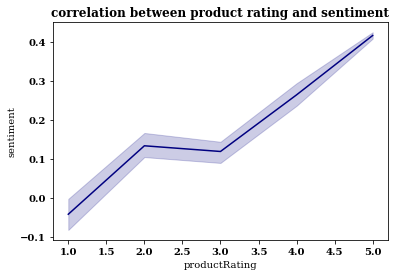

In [519]:
sns.lineplot(data=beauty_df,x='productRating',y='sentiment', color="navy")
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
fig.savefig('corr_sent_rating_beau.png', dpi=100)
plt.show()

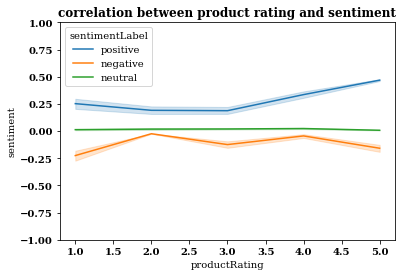

In [520]:
sns.lineplot(data=beauty_df,x='productRating',y='sentiment',hue='sentimentLabel')
plt.ylim(-1,1)
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
fig.savefig('corr_sentlabel_rating_beau.png', dpi=100)
plt.show()

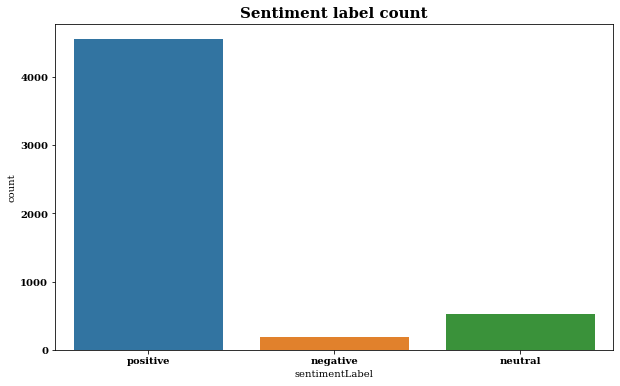

In [521]:
plt.figure(figsize=(10,6))
sns.countplot(data=beauty_df, x="sentimentLabel")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Sentiment label count", fontsize = 15, fontweight = 'bold', color = 'black')
fig.savefig('sentlabel_count_beau.png', dpi=100)
plt.show()

### Analysis on products (productID)


#### Number of reviewed products 

In [522]:
no_of_products = len(beauty_df["productID"].unique())
print("Amount of products that were reviewed: {}".format(no_of_products))

Amount of products that were reviewed: 85


#### Reviews per product 

In [523]:
reviews_per_product = beauty_df.groupby("productID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
reviews_per_product.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER PRODUCT: ")
reviews_per_product

NUMBER OF REVIEWS PER PRODUCT: 


,numberOfReviews
productID,
B0012Y0ZG2,1794
B000URXP6E,858
B001OHV1H4,489
B00006L9LC,489
B0009RF9DW,392
...,...
B00MGK9Z8U,1
B0091OCA86,1
B00B7V273E,1


#### Most and least reviewed products


In [524]:
top_products = reviews_per_product["numberOfReviews"].nlargest(10)

print("MOST REVIEWED PRODUCTS: \n{}".format(top_products))

MOST REVIEWED PRODUCTS: 
productID
B0012Y0ZG2    1794
B000URXP6E     858
B001OHV1H4     489
B00006L9LC     489
B0009RF9DW     392
B000FI4S1E     392
B00W259T7G     163
B0010ZBORW      98
B0013NB7DW      40
B001LNODUS      33
Name: numberOfReviews, dtype: int64


In [525]:
least_products = reviews_per_product["numberOfReviews"].nsmallest(10)

print("LEAST REVIEWED PRODUCTS: \n{}".format(least_products))

LEAST REVIEWED PRODUCTS: 
productID
B00MGK9Z8U    1
B0091OCA86    1
B00B7V273E    1
B00GHJOM2U    1
B01DKQAXC0    1
B00126LYJM    2
B0002JHI1I    2
B0014SQQ3M    2
B00155Z6V2    2
B00157OBRU    2
Name: numberOfReviews, dtype: int64


#### Sentiment labels per product

In [526]:
product_sentiment = beauty_df.groupby(["productID", "sentimentLabel"]).count().sort_values(
    "sentiment", ascending=False)[["sentiment"]]

product_sentiment

,,sentiment
productID,sentimentLabel,
B0012Y0ZG2,positive,1559
B000URXP6E,positive,741
B001OHV1H4,positive,420
B00006L9LC,positive,420
B000FI4S1E,positive,344
...,...,...
B00B7V273E,neutral,1
B00JF2GVWK,neutral,1
B001E96LUO,neutral,1


#### Visualisations

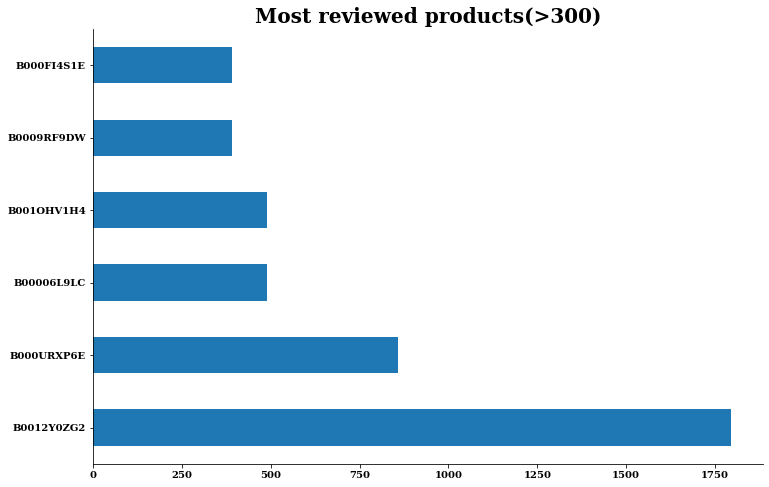

In [527]:
plt.figure(figsize=(12,8))
beauty_df["productID"].value_counts().nlargest(6).plot(kind='barh')
plt.title("Most reviewed products(>300)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('most_rev_prod_beau.png', dpi=100)
plt.show()

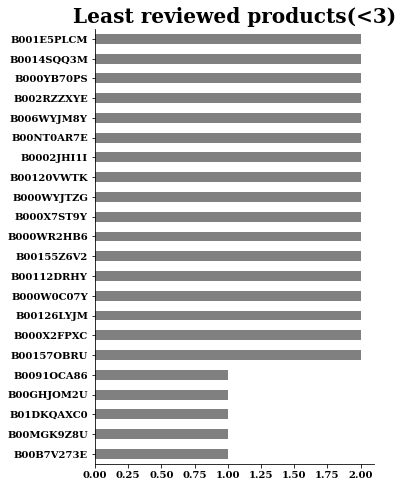

In [528]:
plt.figure(figsize=(5,8))
beauty_df["productID"].value_counts().nsmallest(22).plot(kind='barh', color="grey")
plt.title("Least reviewed products(<3)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('least_rev_prod_beau.png', dpi=100)
plt.show()

### Analysis on reviewers 

#### Number of reviewers

In [529]:
no_of_products = len(beauty_df["reviewerID"].unique())
print("NUmber of reviewers: {}".format(no_of_products))

NUmber of reviewers: 991


#### Review count per reviewer

In [530]:
review_count = beauty_df.groupby("reviewerID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
review_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER REVIEWER: ")
review_count

NUMBER OF REVIEWS PER REVIEWER: 


,numberOfReviews
reviewerID,
A1UQBFCERIP7VJ,12
AKJHHD5VEH7VG,12
A3NFZN1GS1RKR9,11
AUX122XW8ONG6,11
A3HHQ7UIJJAOAV,10
...,...
A2G7EEQJKKOU8R,5
A2G90R2ZU6KU5D,5
A2GBIFL43U1LKJ,5


#### Most reviews done in a day per reviewer

In [531]:
review_per_day = beauty_df.groupby(['reviewTime', 'reviewerID']).count().sort_values(
    'reviewText', ascending=False)[["reviewText"]]
review_per_day.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("MOST REVIEWS DONE IN A DAY PER REVIEWER: ")
review_per_day

MOST REVIEWS DONE IN A DAY PER REVIEWER: 


,,numberOfReviews
reviewTime,reviewerID,
2018-08-23,AUX122XW8ONG6,11
2013-07-19,A3NFZN1GS1RKR9,11
2016-09-24,A3RUBIOZYJNY0D,10
2014-01-05,A36LNAKD2FOHVX,10
2018-04-22,A1L0QECT7J93ZP,10
...,...,...
2017-07-23,A2YKWYC3WQJX5J,1
2017-07-22,A914TQVHI872U,1
2013-05-13,A2JCJJNY43QQIV,1


#### visualisation 

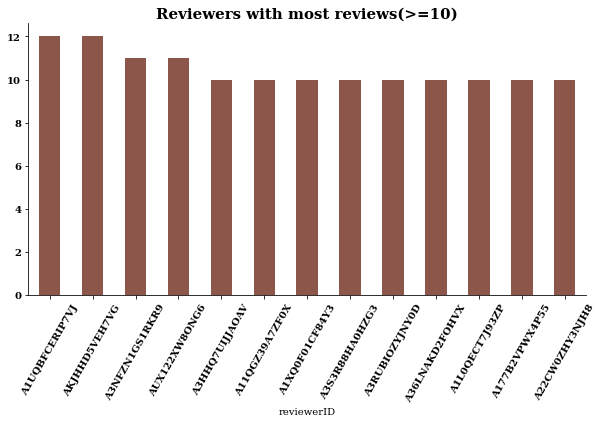

In [532]:
plt.figure(figsize=(10,5))
review_count["numberOfReviews"].nlargest(13).plot(kind="bar",color="tab:brown")
plt.title("Reviewers with most reviews(>=10)", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('reviewer_most_rev_beau.png', dpi=100)
plt.show()

### Analysis on product ratings

In [533]:
axes1 = beauty_df.groupby('productID').count()
axes2 = beauty_df.groupby('productID').mean()

#### Average rating per product

In [534]:
rating_per_product = beauty_df.groupby("productID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_product.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER PRODUCT:")
rating_per_product

AVERAGE RATING PER PRODUCT:


,numberOfReviews,averageProductRating
productID,,
B0012Y0ZG2,1794,4.846154
B000URXP6E,858,4.837995
B001OHV1H4,489,4.762781
B00006L9LC,489,4.762781
B0009RF9DW,392,4.941327
...,...,...
B00MGK9Z8U,1,5.000000
B0091OCA86,1,5.000000
B00B7V273E,1,2.000000


#### Average rating per reviewer

In [535]:
rating_per_reviewer = beauty_df.groupby("reviewerID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_reviewer.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER REVIEWER:")
rating_per_reviewer

AVERAGE RATING PER REVIEWER:


,numberOfReviews,averageProductRating
reviewerID,,
A1UQBFCERIP7VJ,12,4.083333
AKJHHD5VEH7VG,12,3.500000
A3NFZN1GS1RKR9,11,5.000000
AUX122XW8ONG6,11,5.000000
A3HHQ7UIJJAOAV,10,5.000000
...,...,...
A2G7EEQJKKOU8R,5,5.000000
A2G90R2ZU6KU5D,5,5.000000
A2GBIFL43U1LKJ,5,5.000000


#### Least satisfied customers

In [536]:
least_sat_cust = rating_per_reviewer["averageProductRating"].nsmallest(10)

print("LEAST SATISFIED CUSTOMERS: \n{}".format(least_sat_cust))

LEAST SATISFIED CUSTOMERS: 
reviewerID
A3J034YH7UG4KT    1.0
A3IOV1NJ4IM2HC    1.0
A3IJDWW3VVLF3G    1.0
A3JQUR31CLU4VK    1.0
AYKOSAJTP5AVS     1.0
A7ID5H7FWLJHC     1.0
AEL1DK2OJ41ZZ     1.0
ADUKTDKBY4CNP     1.0
A3W3YT08F94PO7    1.0
A1ZM06J2A5XGHY    1.0
Name: averageProductRating, dtype: float64


#### Visualisation

<ipython-input-537-5d7562969a24>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90, fontweight="bold")


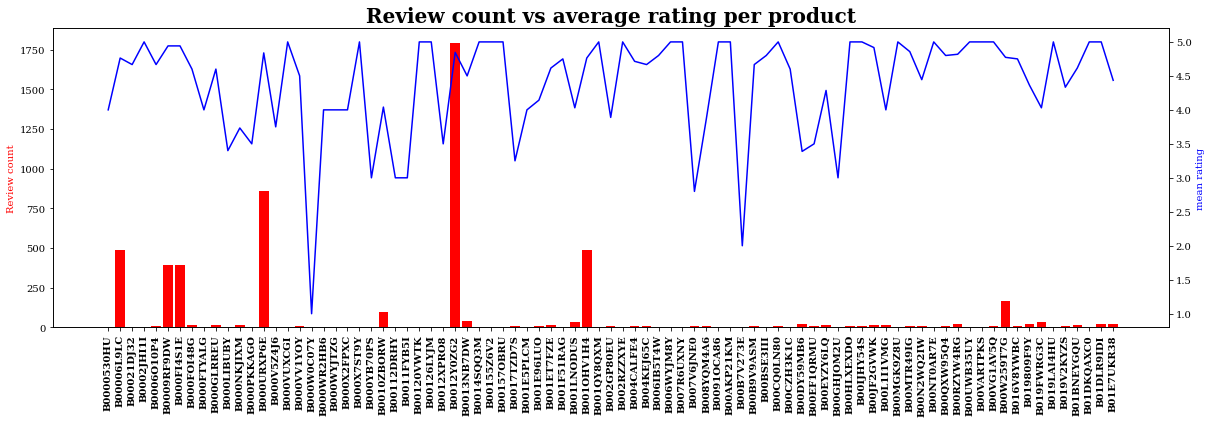

In [537]:
axes1 = beauty_df.groupby('productID').count()
axes2 = beauty_df.groupby('productID').mean()
key = [key for key, df in beauty_df.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90, fontweight="bold")
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('Review count vs average rating per product', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(20, 5.5)
fig.savefig('rev_vs_rating_prod_beau.png', dpi=100)
plt.show()

## Analysis on Appliance category

#### Importing data

In [538]:
appliances_df = pd.read_csv("appliances.csv")

In [539]:
appliances_df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,vote,image
0,0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,NaN,NaN
1,1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,NaN,NaN
2,2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,NaN,NaN
3,3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,NaN,NaN
4,4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,NaN,NaN


In [540]:
appliances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2277 non-null   int64 
 1   overall       2277 non-null   int64 
 2   verified      2277 non-null   bool  
 3   reviewTime    2277 non-null   object
 4   reviewerID    2277 non-null   object
 5   asin          2277 non-null   object
 6   reviewerName  2277 non-null   object
 7   reviewText    2277 non-null   object
 8   vote          2074 non-null   object
 9   image         828 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 162.5+ KB


In [541]:
appliances_df = appliances_df.drop(['vote','image',], axis=1)
appliances_df.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText
0,0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...
1,1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item
2,2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.
3,3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers
4,4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.


In [542]:
del appliances_df["Unnamed: 0"]

In [543]:
appliances_df['reviewTime'] = pd.to_datetime(appliances_df['reviewTime'])

In [544]:
appliances_df.rename(columns={"overall":"productRating","asin":"productID",}, inplace=True)
appliances_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.


In [545]:
appliances_df.isnull().sum()

productRating    0
verified         0
reviewTime       0
reviewerID       0
productID        0
reviewerName     0
reviewText       0
dtype: int64

In [546]:
appliances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   productRating  2277 non-null   int64         
 1   verified       2277 non-null   bool          
 2   reviewTime     2277 non-null   datetime64[ns]
 3   reviewerID     2277 non-null   object        
 4   productID      2277 non-null   object        
 5   reviewerName   2277 non-null   object        
 6   reviewText     2277 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 109.1+ KB


### Analysis with datetimes

In [547]:
appliances_df["reviewTime"] = pd.to_datetime(appliances_df["reviewTime"] )

In [548]:
time_span = appliances_df["reviewTime"].max() - appliances_df["reviewTime"].min()

print ("Time span of the data: {}".format(time_span))

Time span of the data: 3500 days 00:00:00


In [549]:
appliances_df["year"] = appliances_df["reviewTime"].dt.year
appliances_df["yearMonth"] = appliances_df['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [550]:
appliances_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,year,yearMonth
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,2013,August-2013
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item,2016,February-2016
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,2015,August-2015
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,2015,April-2015
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,2015,March-2015


In [551]:
year_count = appliances_df.groupby("year").count().sort_values("reviewText", ascending=False)[["reviewText"]]
year_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER YEAR:")
year_count

AMOUNT OF REVIEWS PER YEAR:


,numberOfReviews
year,
2016,1275
2015,286
2017,220
2011,214
2018,209
2014,49
2013,18
2008,2
2010,2


In [552]:
month_count = appliances_df.groupby("yearMonth").count()[["reviewText"]]
month_count.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("AMOUNT OF REVIEWS PER MONTH:")
month_count

AMOUNT OF REVIEWS PER MONTH:


,numberOfReviews
yearMonth,
April-2014,2
April-2015,10
April-2016,5
April-2017,2
April-2018,1
August-2011,4
August-2013,3
August-2014,8
August-2015,17


In [553]:
yearly_rating = appliances_df.groupby("year").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
yearly_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER YEAR:")
yearly_rating

AVERAGE RATINGS PER YEAR:


,numberOfReviews,averageProductRating
year,,
2016,1275,4.345882
2015,286,4.905594
2017,220,4.963636
2011,214,4.915888
2018,209,4.009569
2014,49,4.448980
2013,18,4.111111
2008,2,5.000000
2010,2,4.000000


In [554]:
yearly_month_rating = appliances_df.groupby(["yearMonth"]).agg({"reviewText":"count", "productRating":"mean"})
yearly_month_rating.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATINGS PER MONTH:")
yearly_month_rating

AVERAGE RATINGS PER MONTH:


,numberOfReviews,averageProductRating
yearMonth,,
April-2014,2,4.000000
April-2015,10,5.000000
April-2016,5,5.000000
April-2017,2,4.000000
April-2018,1,5.000000
August-2011,4,2.000000
August-2013,3,4.333333
August-2014,8,4.375000
August-2015,17,4.058824


In [555]:
len(appliances_df["year"].unique())

10

#### Visualisations

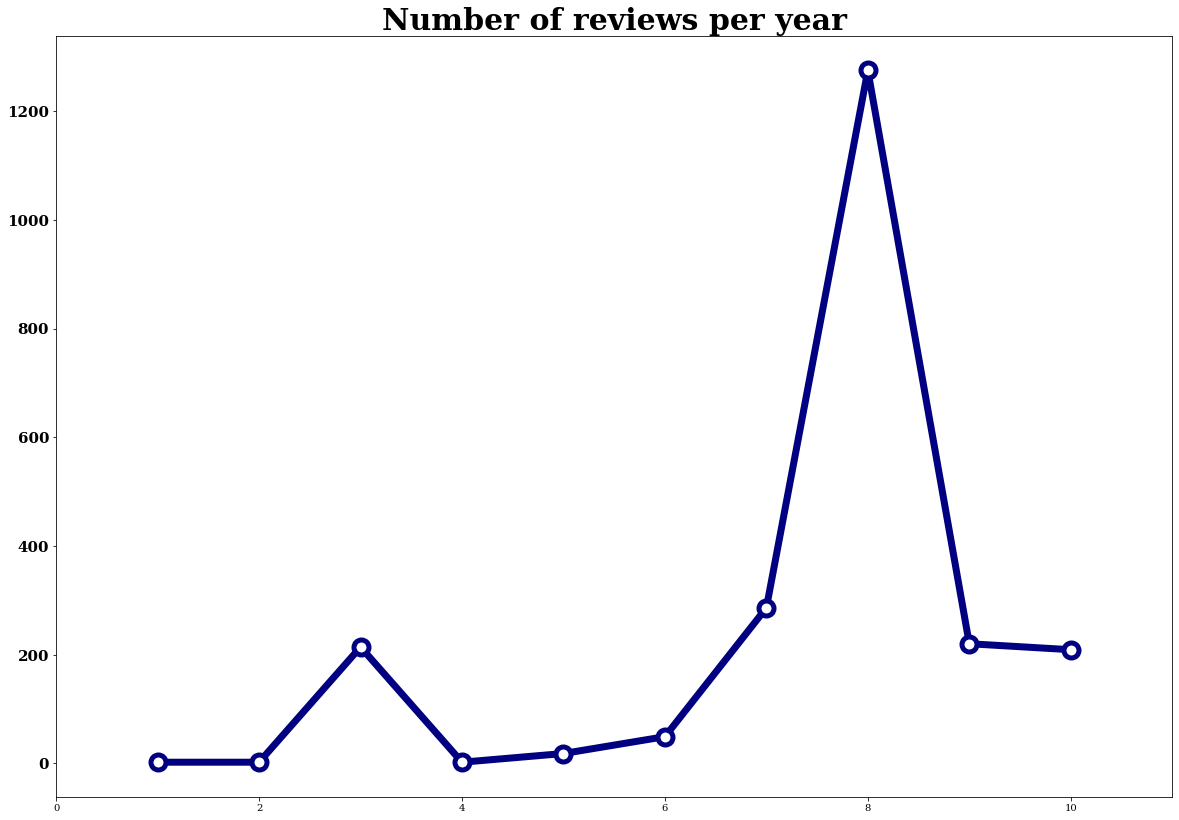

In [556]:
review_count_y  = appliances_df.groupby(['year']).count()[['reviewText']]
axes1 =review_count_y
x = np.arange(1,11)

plt.rc('font', family = 'serif')
fig, ax  = plt.subplots(figsize = (20,14))
plt.xlim(0,11)

ax.plot(x, axes1.reviewText, 'navy', lw = 7)
ax.plot(x, axes1.reviewText, 'wo', markersize = 15, markeredgecolor = 'navy', markeredgewidth = 5, label = 'Number of reviews')      
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'black')

plt.title('Number of reviews per year', fontsize = 30, fontweight = 'bold', color = 'black')
fig.savefig('no_of_rev_appl.png', dpi=100)
plt.show()

<ipython-input-557-113828161d9a>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


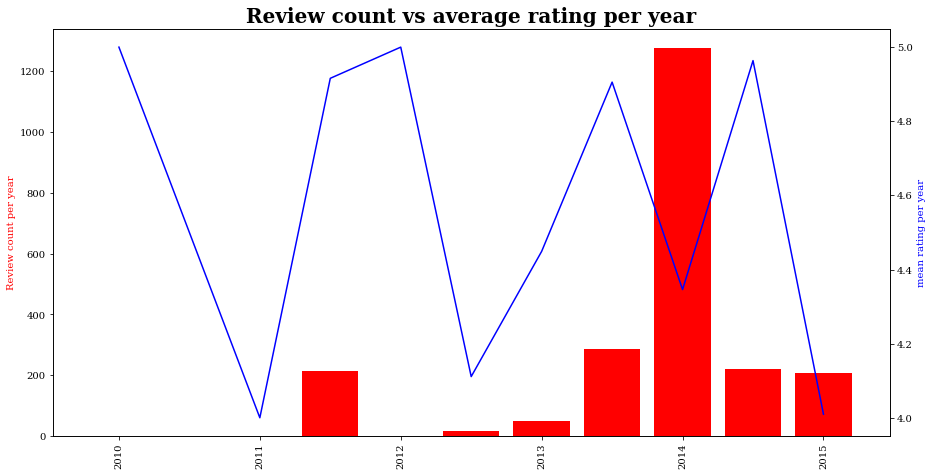

In [557]:
axes1 = appliances_df.groupby(['year']).count()[['reviewText']]
axes2 = appliances_df.groupby('year').mean()[['productRating']]

key = [key for key, df in appliances_df.groupby('year')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per year', color = 'r')
ax2.set_ylabel('mean rating per year', color = 'b')
ax1.set_title('Review count vs average rating per year', fontsize =20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(15, 7.5)
fig.savefig('rev_vs_rating_year_appl.png', dpi=100)
plt.show()

<ipython-input-558-c0cb1bff39f7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90)


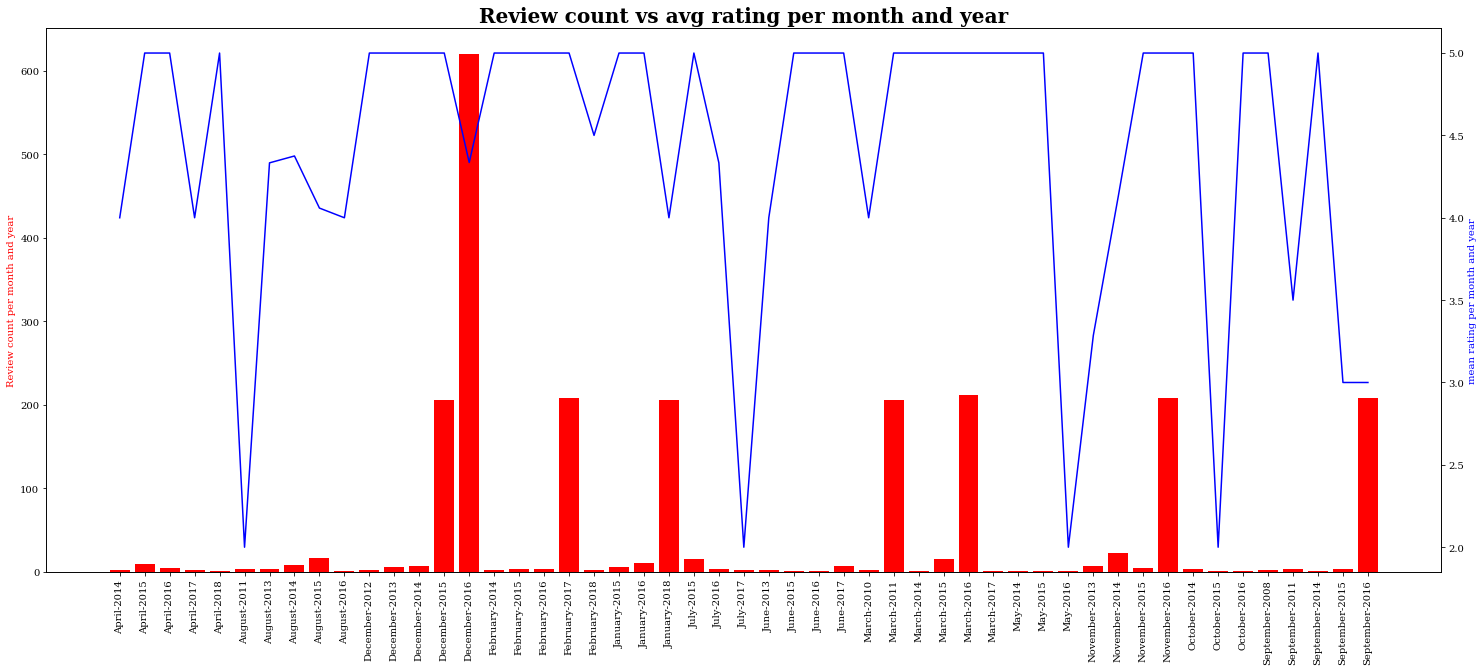

In [558]:
axes1 = appliances_df.groupby(['yearMonth']).count()[['reviewText']]
axes2 = appliances_df.groupby('yearMonth').mean()[['productRating']]

key = [key for key, df in appliances_df.groupby('yearMonth')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('Review count vs avg rating per month and year', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(25, 10)
fig.savefig('rev_vs_rating_month_appl.png', dpi=100)
plt.show()

### Simple sentiment analysis

#### Creating a function to get the sentiment and the sentiment label

In [559]:
def the_sentiment (text):
    blob = TextBlob(text)
    return blob.polarity

def the_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0.05:
        polarity_label = "positive"
    elif blob.polarity < -0.01:
        polarity_label = "negative"
    else:
        polarity_label = "neutral"
    return polarity_label

#### Create new columns for sentiment and sentiment labels

In [560]:
appliances_df["reviewText"] = appliances_df["reviewText"].astype(str)


appliances_df["sentiment"] = appliances_df["reviewText"].apply(the_sentiment)
appliances_df["sentimentLabel"] = appliances_df["reviewText"].apply(the_sentiment_label)

In [561]:
appliances_df.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,year,yearMonth,sentiment,sentimentLabel
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,2013,August-2013,0.400000,positive
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item,2016,February-2016,0.700000,positive
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,2015,August-2015,0.512121,positive
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,2015,April-2015,0.700000,positive
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,2015,March-2015,1.000000,positive


#### Number of each label

In [562]:
appliances_df.groupby(['productRating']).count()[['sentiment']]

,sentiment
productRating,
1,9
2,13
3,421
4,222
5,1612


In [563]:
label_count = appliances_df.groupby("sentimentLabel").count().sort_values("sentiment", ascending=False)[["sentiment"]]

print("NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: ")
label_count

NUMBER OF POSITVE, NEGATIVE AND NEUTRAL REVIEWS: 


,sentiment
sentimentLabel,
positive,1822
neutral,448
negative,7


#### Number of geniue good, neutral and bad engines

In [564]:
gen_good_rating = appliances_df[(appliances_df['sentimentLabel']=='positive') & (appliances_df['productRating']>3)]

print("NUMBER OF GENUINE GOOD RATINGS: {}".format(len(gen_good_rating)))

NUMBER OF GENUINE GOOD RATINGS: 1392


In [565]:
gen_neutral_rating = appliances_df[(appliances_df['sentimentLabel']=='neutral') & (appliances_df['productRating']==3)]

print("NUMBER OF GENUINE NEUTRAL RATINGS: {}".format(len(gen_neutral_rating)))

NUMBER OF GENUINE NEUTRAL RATINGS: 2


In [566]:
gen_bad_rating = appliances_df[(appliances_df['sentimentLabel']=='negative') & (appliances_df['productRating']<3)]

print("NUMBER OF GENUINE BAD RATINGS: {}".format(len(gen_bad_rating)))

NUMBER OF GENUINE BAD RATINGS: 5


#### Dataframe for genuine reviews

In [567]:
genuine_df = gen_good_rating.append(gen_bad_rating)
appliance_genuine = genuine_df.append(gen_neutral_rating)
appliance_genuine

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,year,yearMonth,sentiment,sentimentLabel
0,5,True,2013-08-22,A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,2013,August-2013,0.400000,positive
1,5,True,2016-02-08,A1AHW6I678O6F2,B00009W3PA,kevin.,good item,2016,February-2016,0.700000,positive
2,5,True,2015-08-05,A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,2015,August-2015,0.512121,positive
3,5,True,2015-04-24,AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,2015,April-2015,0.700000,positive
4,5,True,2015-03-21,A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,2015,March-2015,1.000000,positive
...,...,...,...,...,...,...,...,...,...,...,...
61,2,False,2011-08-05,A3LGZ8M29PBNGG,B000W3P4AQ,nerenttt,i cook only once in a blue moon. i was shocke...,2011,August-2011,-0.019301,negative
73,2,False,2011-08-05,A3LGZ8M29PBNGG,B00147DFQ4,nerenttt,i cook only once in a blue moon. i was shocke...,2011,August-2011,-0.019301,negative
2223,1,True,2013-11-02,A2HDUVKXR5CM7H,B00DM8JA7Q,MIKE,piece of garbage switch set to high that it wi...,2013,November-2013,-0.270000,negative
25,3,True,2014-08-29,A1H2V1GNEY4LZ0,B000XXWOGW,Handyman,The connect did not match up where I had to mo...,2014,August-2014,0.000000,neutral


#### Visualisations

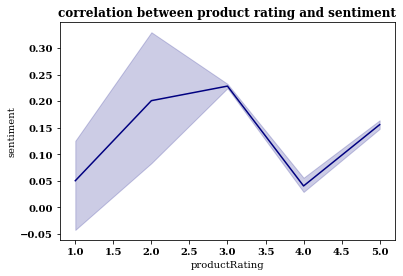

In [568]:
sns.lineplot(data=appliances_df,x='productRating',y='sentiment', color="navy")
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
fig.savefig('corr_sent_rating_appl.png', dpi=100)
plt.show()

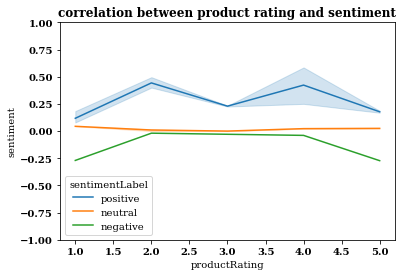

In [569]:
sns.lineplot(data=appliances_df,x='productRating',y='sentiment',hue='sentimentLabel')
plt.ylim(-1,1)
plt.title('correlation between product rating and sentiment', fontsize = 12, fontweight = 'bold', color = 'black')
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
fig.savefig('corr_sentlabel_rating_appl.png', dpi=100)
plt.show()

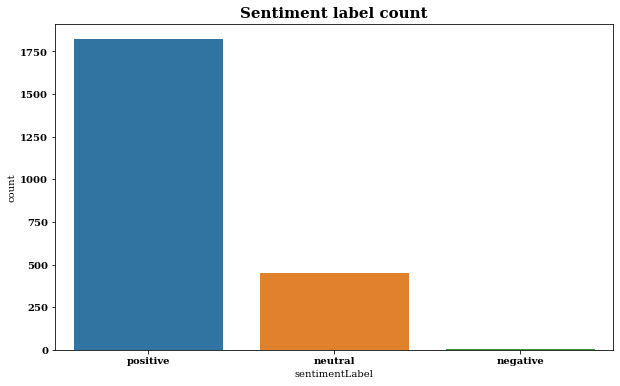

In [570]:
plt.figure(figsize=(10,6))
sns.countplot(data=appliances_df, x="sentimentLabel")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Sentiment label count", fontsize = 15, fontweight = 'bold', color = 'black')
fig.savefig('sentlabel_count_appl.png', dpi=100)
plt.show()

### Analysis on products (productID)

In [571]:
no_of_products = len(appliances_df["productID"].unique())
print("Amount of products that were reviewed: {}".format(no_of_products))

Amount of products that were reviewed: 48


In [572]:
reviews_per_product = appliances_df.groupby("productID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
reviews_per_product.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER PRODUCT: ")
reviews_per_product

NUMBER OF REVIEWS PER PRODUCT: 


,numberOfReviews
productID,
B0006GVNOA,2040
B0014CN8Y8,24
B00JGTUQJ6,13
B0015UGPWQ,12
B004XLDE5A,8
B000XXWOGW,8
B0056I99WG,8
B00CW0O1EW,8
B001DPFP88,7


In [573]:
top_products = reviews_per_product["numberOfReviews"].nlargest(10)

print("MOST REVIEWED PRODUCTS: \n{}".format(top_products))

MOST REVIEWED PRODUCTS: 
productID
B0006GVNOA    2040
B0014CN8Y8      24
B00JGTUQJ6      13
B0015UGPWQ      12
B004XLDE5A       8
B000XXWOGW       8
B0056I99WG       8
B00CW0O1EW       8
B001DPFP88       7
B000NCTOUM       7
Name: numberOfReviews, dtype: int64


In [574]:
least_products = reviews_per_product["numberOfReviews"].nsmallest(10)

print("LEAST REVIEWED PRODUCTS: \n{}".format(least_products))

LEAST REVIEWED PRODUCTS: 
productID
B00009W3I4    1
B00BIZDI0A    1
B009PCI2JU    1
B0045LLC7K    1
B001DPQPKU    1
B0009GVYNW    1
B0042ACZU2    1
B0042U16YI    2
B0015S4KIO    2
B00149JVOC    2
Name: numberOfReviews, dtype: int64


#### Sentiment labels per product

In [575]:
product_sentiment = appliances_df.groupby(["productID", "sentimentLabel"]).count().sort_values("sentiment", ascending=False)[["sentiment"]]

product_sentiment

sentiment
productID  sentimentLabel           
B0006GVNOA positive             1632
           neutral               408
B0014CN8Y8 positive               20
B00JGTUQJ6 positive               10
B004XLDE5A positive                8
...                              ...
B001DPFP88 neutral                 1
B00186NSGS positive                1
           negative                1
B0009GVYNW positive                1
B0042U16YI neutral                 1

[71 rows x 1 columns]

#### Visualisations

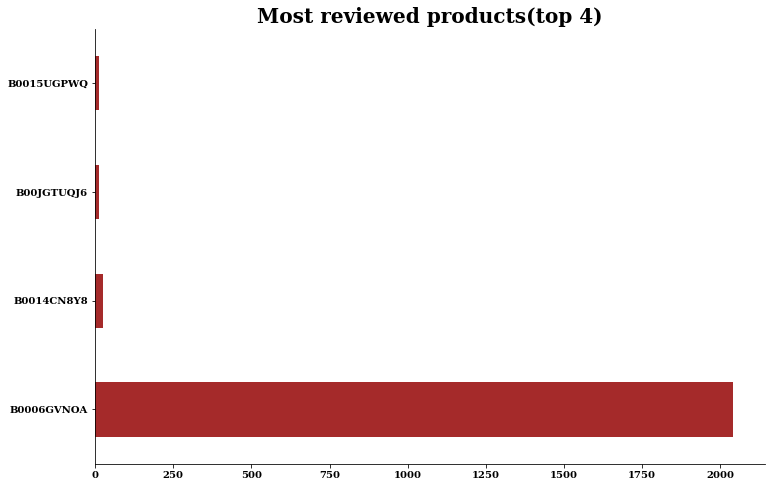

In [576]:
plt.figure(figsize=(12,8))
appliances_df["productID"].value_counts().nlargest(4).plot(kind='barh', color="brown")
plt.title("Most reviewed products(top 4)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('most_rev_prod_appl.png', dpi=100)
plt.show()

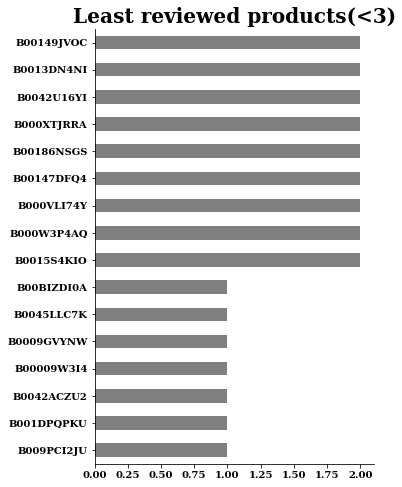

In [577]:
plt.figure(figsize=(5,8))
appliances_df["productID"].value_counts().nsmallest(16).plot(kind='barh', color="grey")
plt.title("Least reviewed products(<3)", fontsize=20, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black')       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('least_rev_prod_appl.png', dpi=100)
plt.show()

### Analysis on Reviewers

#### Number of reviewers

In [578]:
no_of_reviewers = len(appliances_df["reviewerID"].unique())
print("Number of reviewers: {}".format(no_of_products))

Number of reviewers: 48


#### Review count per reviewer

In [579]:
count_review = appliances_df.groupby("reviewerID").count().sort_values("reviewText", ascending=False)[["reviewText"]]
count_review.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("NUMBER OF REVIEWS PER REVIEWER: ")
count_review

NUMBER OF REVIEWS PER REVIEWER: 


,numberOfReviews
reviewerID,
A25C30G90PKSQA,206
A1IT56MV1C09VS,206
A2B2JVUX5YN8RU,206
A21TPY9BVC9IKZ,206
A1WD61B0C3KQZB,206
A3VYM3NY7W4MX4,206
A3TMNU7VNK5JJE,206
A8WEXFRWX1ZHH,206
AMY6O4Z9HINO0,206


#### Most reviews done in a day per reviewer

In [580]:
review_per_day = appliances_df.groupby(['reviewTime', 'reviewerID']).count().sort_values(
    'reviewText', ascending=False)[["reviewText"]]
review_per_day.rename(columns={"reviewText":"numberOfReviews"}, inplace=True)

print("MOST REVIEWS DONE IN A DAY PER REVIEWER: ")
review_per_day

MOST REVIEWS DONE IN A DAY PER REVIEWER: 


numberOfReviews
reviewTime reviewerID                     
2015-12-05 A2LDP3A4IE9T6T              206
2016-09-10 A3TMNU7VNK5JJE              206
2016-12-06 A25C30G90PKSQA              206
           A2B2JVUX5YN8RU              206
2016-12-21 A3VYM3NY7W4MX4              206
...                                    ...
2014-10-19 A2O7BWHBIV1HWZ                1
2016-05-26 A1HWFUO5PKB2RW                1
2016-06-16 A3J8IC20SGBS2O                1
2015-07-04 AFUVGAUNQVT0S                 1
2018-04-17 A13391AZAFJ67K                1

[107 rows x 1 columns]

#### visualisation 

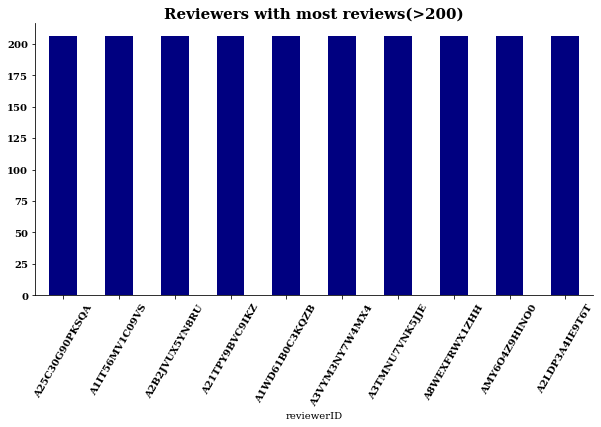

In [581]:
plt.figure(figsize=(10,5))
count_review["numberOfReviews"].nlargest(10).plot(kind="bar",color="navy")
plt.title("Reviewers with most reviews(>200)", fontsize=15, fontweight="bold")
plt.xticks(fontweight = 'bold', color = 'black', rotation=60)       
plt.yticks(fontsize = 10, fontweight = 'bold', color = 'black')
sns.despine()
fig.savefig('reviewer_most_rev_appl.png', dpi=100)
plt.show()

### Analysis on product ratings

In [582]:
axes1 = appliances_df.groupby('productID').count()
axes2 = appliances_df.groupby('productID').mean()

#### Average rating per product

In [583]:
rating_per_product = appliances_df.groupby("productID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_product.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER PRODUCT:")
rating_per_product

AVERAGE RATING PER PRODUCT:


,numberOfReviews,averageProductRating
productID,,
B0006GVNOA,2040,4.500000
B0014CN8Y8,24,4.500000
B00JGTUQJ6,13,5.000000
B0015UGPWQ,12,4.833333
B004XLDE5A,8,4.500000
B000XXWOGW,8,3.500000
B0056I99WG,8,4.125000
B00CW0O1EW,8,5.000000
B001DPFP88,7,5.000000


#### Average rating per reviewer

In [584]:
rating_per_reviewer = appliances_df.groupby("reviewerID").agg({"reviewText":"count","productRating":"mean"}).sort_values(
    "reviewText",ascending=False)
rating_per_reviewer.rename(columns={"reviewText":"numberOfReviews", "productRating":"averageProductRating"}, inplace=True)

print("AVERAGE RATING PER REVIEWER:")
rating_per_reviewer

AVERAGE RATING PER REVIEWER:


,numberOfReviews,averageProductRating
reviewerID,,
A25C30G90PKSQA,206,3.000000
A1IT56MV1C09VS,206,5.000000
A2B2JVUX5YN8RU,206,5.000000
A21TPY9BVC9IKZ,206,5.000000
A1WD61B0C3KQZB,206,4.000000
A3VYM3NY7W4MX4,206,5.000000
A3TMNU7VNK5JJE,206,3.000000
A8WEXFRWX1ZHH,206,5.000000
AMY6O4Z9HINO0,206,5.000000


#### Least satisfied customers

In [585]:
least_sat_cust = rating_per_reviewer["averageProductRating"].nsmallest(10)

print("LEAST SATISFIED CUSTOMERS: \n{}".format(least_sat_cust))

LEAST SATISFIED CUSTOMERS: 
reviewerID
A3SM7H70QI3TY8    1.0
A3LGZ8M29PBNGG    2.0
AJPRN1TD1A0SD     2.2
A1HWFUO5PKB2RW    2.2
A2HDUVKXR5CM7H    2.6
A25C30G90PKSQA    3.0
A3TMNU7VNK5JJE    3.0
A26Y776G7VVBCQ    3.8
A1WD61B0C3KQZB    4.0
A1OB2H416ARLFJ    4.0
Name: averageProductRating, dtype: float64


#### Visualisations

<ipython-input-586-5533d62da2c7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation = 90, fontweight="bold")


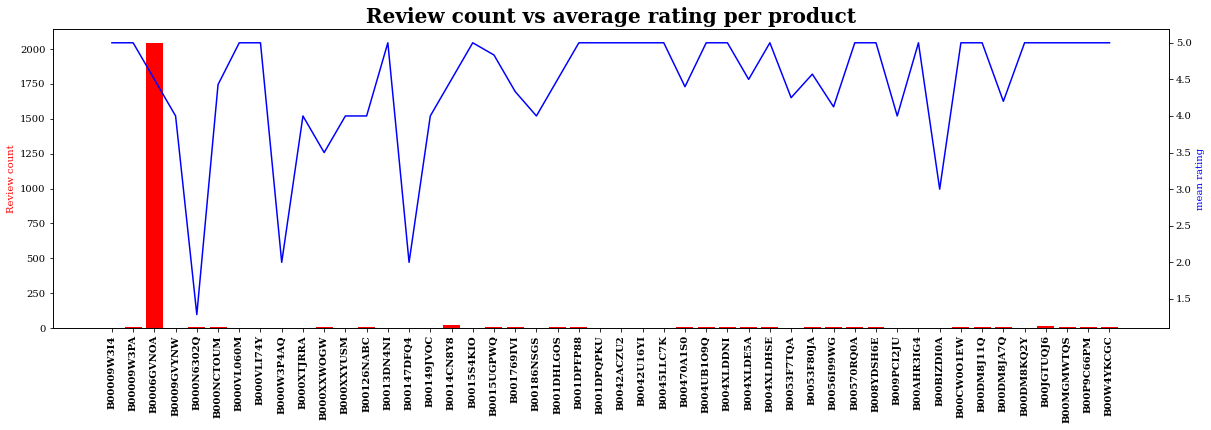

In [586]:
axes1 = appliances_df.groupby('productID').count()
axes2 = appliances_df.groupby('productID').mean()
key = [key for key, df in appliances_df.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90, fontweight="bold")
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('Review count vs average rating per product', fontsize=20, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(20, 5.5)
fig.savefig('rev_vs_rating_prod_appl.png', dpi=100)
plt.show()